In [1]:
using Distributions, Turing
using Gadfly

In [2]:
@model gdemo(x) = begin
  s ~ InverseGamma(2,3)
  m ~ Normal(0,sqrt(s))
  x[1] ~ Normal(m, sqrt(s))
  x[2] ~ Normal(m, sqrt(s))
  return s, m
end

gdemo (generic function with 2 methods)

In [3]:
s = sample(gdemo([1.5, 2]), HMC(1000, 0.25, 5));

[Turing]:  Assume - `s` is a parameter
  in @~(::Any, ::Any) at compiler.jl:49
[Turing]:  Assume - `m` is a parameter
  in @~(::Any, ::Any) at compiler.jl:49
[Turing]:  Observe - `x` is an observation
  in @~(::Any, ::Any) at compiler.jl:28


[HMC] Sampling...  0%  ETA: 0:34:26
  ϵ:  0.25
  α:  1.0

[HMC] Finished with
  Running time    = 2.967965091000004;


[HMC] Sampling... 97%  ETA: 0:00:00
  ϵ:  0.25
[HMC] Sampling...100% Time: 0:00:03


  Accept rate     = 0.986;
  #lf / sample    = 4.995;
  #evals / sample = 4.997.


In [4]:
describe(s)

Iterations = 1:1000
Thinning interval = 1
Chains = 1
Samples per chain = 1000

Empirical Posterior Estimates:
      Mean        SD       Naive SE      MCSE        ESS   
 m  1.1757134 0.80145571 0.025344255 0.015384072 1000.00000
lp -5.7545374 1.06207700 0.033585824 0.069933231  230.64541
 s  1.9711755 1.55179631 0.049072108 0.079219322  383.71360

Quantiles:
      2.5%       25.0%      50.0%      75.0%      97.5%  
 m -0.4819563  0.6803066  1.1604209  1.6850787  2.8444464
lp -8.5909431 -6.2401039 -5.4410076 -4.9533080 -4.6297224
 s  0.5505013  1.0267217  1.5577692  2.4004035  6.1843388



In [5]:
p = plot(s);

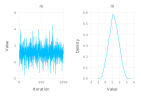

In [6]:
hstack(p[1:2])

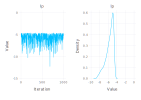

In [7]:
hstack(p[3:4])

In [8]:
heideldiag(s)

   Burn-in Stationarity p-value    Mean     Halfwidth  Test
 m       0            1  0.9910  1.1757134 0.053502752    1
lp       0            1  0.3206 -5.7545374 0.099961295    1
 s       0            1  0.2602  1.9711755 0.104838762    1

